# Example: Categorical data processing 

In [1]:
import pandas as pd

# Create a list of text documents
dataset_with_categories = [["duck", "table", "green"], 
        ["fox", "desk", "blue"],
        ["duck", "desk", "yellow"],
        ["cat", "table", "red"]]

df = pd.DataFrame(dataset_with_categories, columns=["category1", "category2", "category3"])
print(df)

print("\n\n")

# OneHot Encode the categorical features within the Dataframe
df = pd.get_dummies(df)

# Show the result
print(df)

  category1 category2 category3
0      duck     table     green
1       fox      desk      blue
2      duck      desk    yellow
3       cat     table       red



   category1_cat  category1_duck  category1_fox  category2_desk  \
0              0               1              0               0   
1              0               0              1               1   
2              0               1              0               1   
3              1               0              0               0   

   category2_table  category3_blue  category3_green  category3_red  \
0                1               0                1              0   
1                0               1                0              0   
2                0               0                0              0   
3                1               0                0              1   

   category3_yellow  
0                 0  
1                 0  
2                 1  
3                 0  


# Example: Numerical data processing
## MinMaxScaler

In [2]:
from sklearn.preprocessing import MinMaxScaler
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

# Create data
data = [[-1, 2], 
        [-0.5, 6], 
        [0, 10], 
        [1, 18]]

# Create scaler
scaler = MinMaxScaler()

# Fit the scaler to the feature data
scaler.fit(data)

# Transform the feature data
print(f"Output: {scaler.transform(data)}")

Output: [[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


## Pandas Style

In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create data
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

# Create dataframe
df = pd.DataFrame(data, columns=["feature1", "feature2"])

# Create scaler
scaler = MinMaxScaler()
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

# Fit the scaler to the feature data
scaler.fit(df)

# Transform the feature data
scaled_df = scaler.transform(df)

print(f"Output: {scaled_df}")

Output: [[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


## Mix of Categorical and Numerical Values

In [4]:
# Create an example dataset with numerical and categorical data
import pandas
from sklearn.preprocessing import MinMaxScaler

dataset = [[1, 2, 3, "dog", "cat", "fox"],
        [4, 5, 6, "dog", "duck", "fox"],
        [7, 8, 9, "duck", "duck", "duck"]]

df = pandas.DataFrame(dataset, columns=["feature1", "feature2", "feature3", "category1", "category2", "category3"])

# Show the result
print(f"Original Dataframe {df}\n\n\n")

# OneHot Encode the categorical features within the Dataframe
df = pandas.get_dummies(df)

# Show the result
print("One-Hot-Encoded Dataframe")
print(df)

# Scale the numerical features within the Dataframe
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

# Show the result
print(f"Final result: {scaled_df}\n\n\n")

Original Dataframe    feature1  feature2  feature3 category1 category2 category3
0         1         2         3       dog       cat       fox
1         4         5         6       dog      duck       fox
2         7         8         9      duck      duck      duck



One-Hot-Encoded Dataframe
   feature1  feature2  feature3  category1_dog  category1_duck  category2_cat  \
0         1         2         3              1               0              1   
1         4         5         6              1               0              0   
2         7         8         9              0               1              0   

   category2_duck  category3_duck  category3_fox  
0               0               0              1  
1               1               0              1  
2               1               1              0  
Final result: [[0.  0.  0.  1.  0.  1.  0.  0.  1. ]
 [0.5 0.5 0.5 1.  0.  0.  1.  0.  1. ]
 [1.  1.  1.  0.  1.  0.  1.  1.  0. ]]





# Example: Text data processing

In [5]:
# GIve me examples for Text data processing with sklearn. Show me the countVectorizer

from sklearn.feature_extraction.text import CountVectorizer

# Create a list of text documents
text = ["The quick brown fox jumped over the lazy dog.", "The duck filtered the water.", "The fox and the duck are friends."]

# Create the transform
# vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5)
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5, stop_words='english')

# Tokenize and build vocab
vectorizer.fit(text)

# Summarize
print(f"Vocabulary: {vectorizer.vocabulary_}")

# Encode document
vector = vectorizer.transform([text[0]])

# Summarize encoded vector
print(f"Vector Shape: {vector.shape}")

# Show vectorized output
print(f"Vocabulary: {vector.toarray()}")

# Use the vectorizer to transform the text
vector = vectorizer.transform(text)

# Show vectorized output
print(f"Vectorized Output: {vector.toarray()}")

Vocabulary: {'quick': 4, 'brown': 0, 'fox': 2, 'lazy dog': 3, 'duck': 1}
Vector Shape: (1, 5)
Vocabulary: [[1 0 1 1 1]]
Vectorized Output: [[1 0 1 1 1]
 [0 1 0 0 0]
 [0 1 1 0 0]]


# Combining Datasets with target values

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

dataset = [[1, 2, 3, "dog", "cat", "fox", 1],
        [4, 5, 6, "dog", "duck", "fox", 0],
        [7, 8, 9, "duck", "duck", "duck", 1]]

df = pd.DataFrame(dataset, columns=["feature1", "feature2", "feature3", "category1", "category2", "category3", "target"])

# Show the result
print(f"Original Dataframe: {df}\n\n\n")

# OneHot Encode the categorical features within the Dataframe
df = pd.get_dummies(df)

# MinMax Scale the numerical features within the Dataframe
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

# Show the result
print(f"Dataframe with OneHotEncoding and MinMaxScaling: {scaled_df}\n\n\n")

# Split the data into features and target
features = scaled_df[:, 0:9]
target = scaled_df[:, 9]

# Show the result
print(f"Features: {features}\n\n\n")
print(f"Target: {target}\n\n\n")

Original Dataframe:    feature1  feature2  feature3 category1 category2 category3  target
0         1         2         3       dog       cat       fox       1
1         4         5         6       dog      duck       fox       0
2         7         8         9      duck      duck      duck       1



Dataframe with OneHotEncoding and MinMaxScaling: [[0.  0.  0.  1.  1.  0.  1.  0.  0.  1. ]
 [0.5 0.5 0.5 0.  1.  0.  0.  1.  0.  1. ]
 [1.  1.  1.  1.  0.  1.  0.  1.  1.  0. ]]



Features: [[0.  0.  0.  1.  1.  0.  1.  0.  0. ]
 [0.5 0.5 0.5 0.  1.  0.  0.  1.  0. ]
 [1.  1.  1.  1.  0.  1.  0.  1.  1. ]]



Target: [1. 1. 0.]





# Identify unbalanced data for categorical targets

Number of positive examples: 6
Number of negative examples: 5


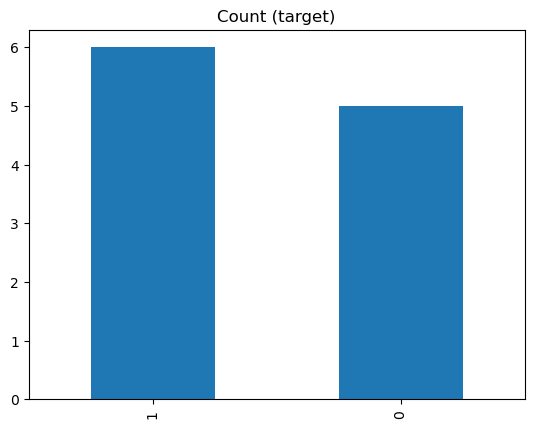

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

large_dataset = [[1, 2, 3, "dog", "cat", "fox", 1],
        [4, 5, 6, "dog", "duck", "fox", 0],
        [7, 8, 9, "duck", "duck", "duck", 1],
        [10, 11, 12, "dog", "cat", "fox", 0],
        [13, 14, 15, "dog", "duck", "fox", 1],
        [16, 17, 18, "duck", "duck", "duck", 0],
        [19, 20, 21, "dog", "cat", "fox", 1],
        [22, 23, 24, "dog", "duck", "fox", 0],
        [25, 26, 27, "duck", "duck", "duck", 1],
        [28, 29, 30, "dog", "cat", "fox", 0],
        [31, 32, 33, "dog", "duck", "fox", 1]]

# Create a Dataframe from the dataset
df = pd.DataFrame(large_dataset, columns=["feature1", "feature2", "feature3", "category1", "category2", "category3", "target"])

# How to check if the dataset is unbalanced
print(f"Number of positive examples: {df[df['target'] == 1].shape[0]}")
print(f"Number of negative examples: {df[df['target'] == 0].shape[0]}")

# Show the balance graphically
df['target'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

# Identify unbalanced data for numerical targets

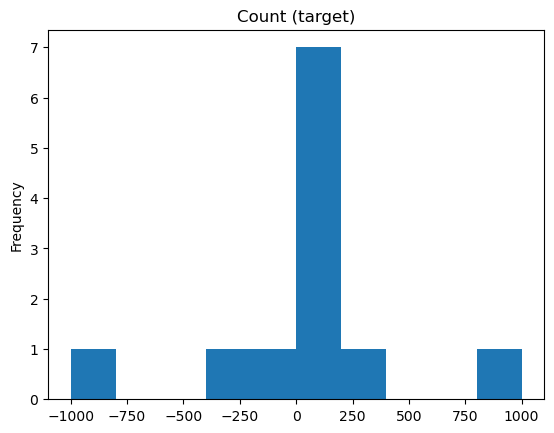

In [8]:
# Show the same example for regression target variable. Is is unbalanced?
large_dataset = [[1, 2, 3, "dog", "cat", "fox", 354],
        [4, 5, 6, "dog", "duck", "fox", -234],
        [7, 8, 9, "duck", "duck", "duck", 112],
        [10, 11, 12, "dog", "cat", "fox", 9],
        [13, 14, 15, "dog", "duck", "fox", -5],
        [16, 17, 18, "duck", "duck", "duck", 3],
        [19, 20, 21, "dog", "cat", "fox", 2],
        [22, 23, 24, "dog", "duck", "fox", 1],
        [25, 26, 27, "duck", "duck", "duck", 0],
        [28, 29, 30, "dog", "cat", "fox", 0],
        [31, 32, 33, "dog", "duck", "fox", -1000],
        [34, 35, 36, "duck", "duck", "duck", 1000]]

# Create a Dataframe from the dataset
df = pd.DataFrame(large_dataset, columns=["feature1", "feature2", "feature3", "category1", "category2", "category3", "target"])

# Show the balance graphically
df['target'].plot(kind='hist', title='Count (target)')
plt.show()